<a href="https://colab.research.google.com/github/dkaratzas/ML2025-26/blob/main/Session%203%20-%20Logisticc%20Regression/P3_Logistic_Regression_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/ML2025-26/blob/main/Session%203%20-%20Logistic%20Regression/P3_Logistic_Regression_Solutions.ipynb)

# Problems 3 - Logistic Regression

## 3.1 Logistic Regression

We are going to train a binary classifier using the Logistic Regression model: $f_w(\textbf{x}) = \frac{1}{1+e^{-w^\intercal \textbf{x}}}$

For this we need to fit the parameters $w$ to our dataset by minimizing the cost function $J$:

$\hat{w} = \underset{w}{\text{minimize}} (J) = \underset{w}{\text{minimize}} {1 \over m} \sum_{i=1}^m{(-y^{(i)}\log(f_w(x^{(i)}) - (1-y^{(i)})\log(1-f_w(x^{(i)}))}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in the training set.

We are going to use the Gradient Descent algorithm to solve this minimization problem, in pseudo-code:

```repeat until convergence (or max. number of iterations)```

{

$w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$ (for all j)

}

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by:

$\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

Notice that the partial derivative of our cost function has the same form as for the Linear Regression cost function, however the difference is in the term $f_w(\textbf{x})$, our model. In the case of Logistic Regression $f_{\textbf{w}}(\textbf{x})$ is the sigmoid function of $\textbf{w}^\intercal \textbf{x}$.

Thus, the Python code of our **GradientDescent** function is going to be quite the same as for Linear Regression, but calling the **sigmoid** function to evaluate the Logistic Regression model $f_w(\textbf{x})$.

In [25]:
import numpy as np

def sigmoid(X):
    '''
    Computes the Sigmoid function of the input argument X.
    '''
    return 1.0/(1+np.exp(-X))


def GradientDescent_logistic(X,y,max_iterations=10000, alpha=0.1, epsilon = 0.000001):
    m, n = X.shape # number of samples, number of features
    J = []

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations or until we have converged
    for iteration in range(max_iterations):
        f_x = sigmoid(np.dot(X, w))
        error = (f_x-y)
        gradient = np.dot(X.T , error) / m
        w = w - alpha*gradient
        
        J.append( sum(-y*np.log(f_x)-(1-y)*np.log(1-f_x)) / m )
        
        if (iteration > 1) and (J[-2] - J[-1]) < epsilon:
            print("Converged after {} iterations".format(iteration))
            break
            
    return [w, J]

def classifyVector(X, w):
    '''
    Evaluate the Logistic Regression model with parameters w,
    and return the predicted label of x.
    '''
    prob = sigmoid(np.dot(X, w))
    ret = np.zeros_like(prob) # These next three lines are just in order to be able to deal with single (vector) or multiple (matrix) inputs
    ret[prob > 0.5] = 1
    ret = ret.squeeze()
    return ret

Let's see how to use this code in a synthetic dataset. First load the data and plot it.

In [26]:
# Load the synthetic dataset
import pickle

with open('./P3data_linear.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(100, 2)
(100,)


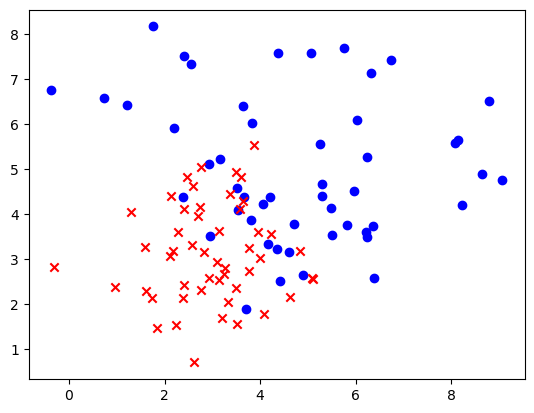

In [27]:
# Plot the data

%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

Now, we train the Logistic Regression classifier and draw its decision boundary in a 2D plot.

In [28]:
# Append the x0 column (for the bias term w0)
m, n = X.shape # m is the number of samples and n is the number of features
ones = np.ones(shape=(m, 1))
Xaugmented = np.hstack( (ones, X) ) #The Design Matrix, which is the original data augmented with the first column of ones

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(Xaugmented, y)

#Evaluate the classifier accuracy in the training data
H = classifyVector(Xaugmented, w)
print ("Training Accuracy :", np.sum(H == y) / m)

Converged after 5690 iterations
Training Accuracy : 0.82


Next we will define a function to plot the decision boundary, along with data, given a set of weights. You can accept this function as is.

In [36]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary(X, y, w):    
    #Plot data
    plt.scatter(X[:, 0], X[:,1], cmap = "Set1", c = y)

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):            
            z[i, j] = sigmoid(np.dot(np.array([1,u[i],v[j]]),w))

    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()

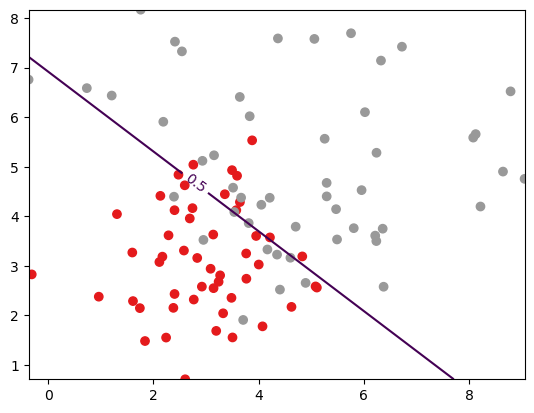

In [37]:
plotDecisionBoundary(X, y, w)

As can be seen in the previous plot a linear classifier fits poorly our data. That does not mean that the gradient descent has not converged, but the best possible solution using a line is not good at all. Check that the learning process has actually converged:

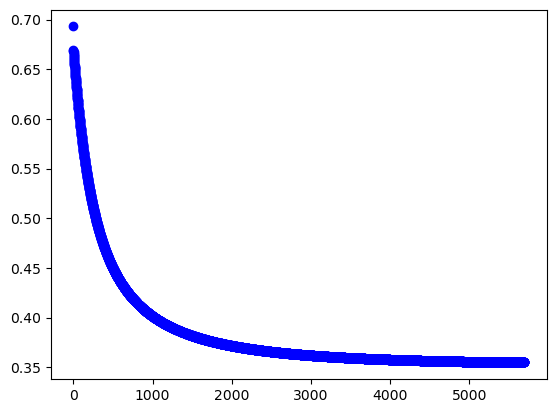

In [7]:
plt.plot(np.arange(len(J)), J, 'bo')

## 3.2 Multi-class Classification

In [8]:
# Load the synthetic dataset
import pickle

with open('P3data_multiclass.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(100, 2)
(100,)


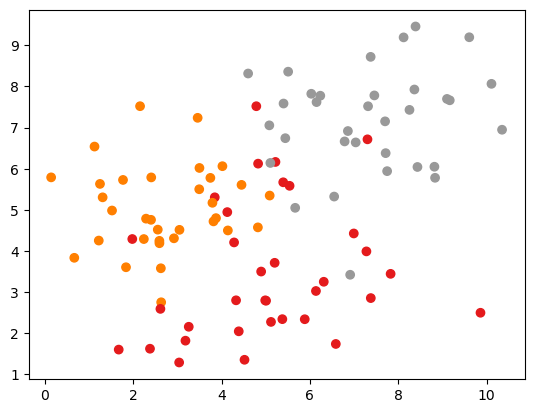

In [9]:
# Plot the data
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], cmap = "Set1", c = y)
plt.show()

<font color="blue">Train three 1-vs-All Logistic Regression classifiers, one for each class, and plot the three decision boundaries</font>

Converged after 1993 iterations
Converged after 2530 iterations
Converged after 9659 iterations


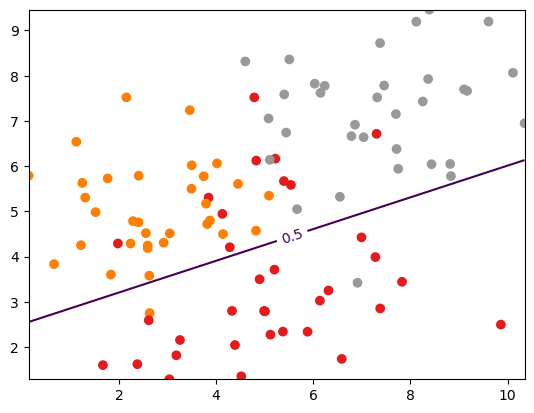

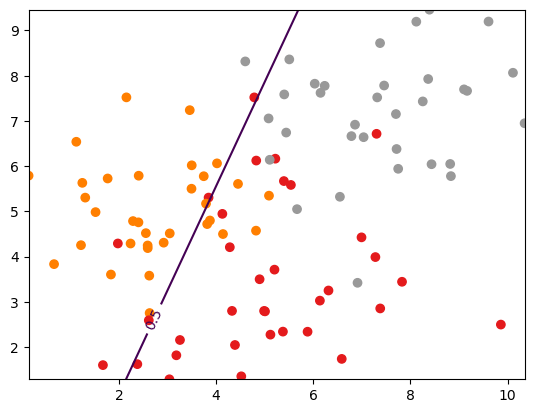

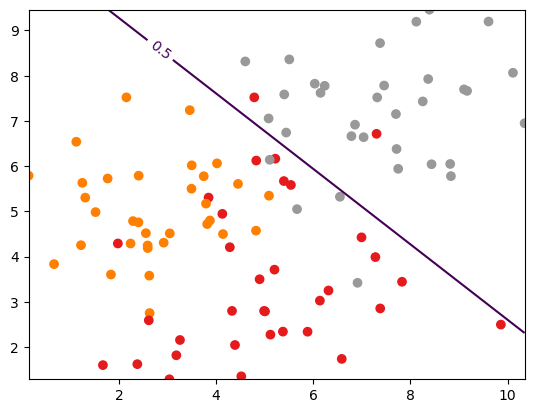

In [10]:
# Your Code Here

w = []
J = []

# Append the x0 column (for the bias term w0)
m, n = X.shape # m is the number of samples and n is the number of features
ones = np.ones(shape=(m, 1))
Xaugmented = np.hstack( (ones, X) )

for c in range(3):
    loc = (y == c) # find the locations of the data that correspond to this class
    y_temp = np.zeros_like(y) # create a temporary column of out values, of the same size like the original data
    y_temp[loc] = 1 # set the locations corrsponding to the class we are interested in to 1

    #Logistic Regression gradient descent optimization
    w_temp, J_temp = GradientDescent_logistic(Xaugmented, y_temp)
    w.append(w_temp)
    J.append(J_temp)
    
plotDecisionBoundary(X, y, w[0])
plotDecisionBoundary(X, y, w[1])
plotDecisionBoundary(X, y, w[2])

<font color="blue">Adapt the `classifyVector()` function (define a `classifyVectorMulticlass()` one) in order to be able to do multi-class classification. Then use it to calculate the accuracy of your multi-class classifier over the training set.</font>

In [11]:
# Your Code Here

def classifyVectorMulticlass(X, w):
    '''
    Evaluate the Logistic Regression model with parameters w,
    and return the predicted label of x.
    w here is a matrix, where each row is the 1 vs all classifier for the corresponding class
    '''
    prob = sigmoid(np.dot(X, w))
    prob = np.squeeze(prob) # By doing this we can use the same code for a single data point, or for multiple ones

    return np.argmax(prob, axis = prob.ndim - 1) # the axis argument is what allows us to deal with multiple or single data point inputs

H = classifyVectorMulticlass(Xaugmented, w)
print(H)
print ("Training Accuracy :", np.sum(H == y) / m)

[2 2 0 2 0 0 1 1 1 0 2 1 2 2 1 2 2 0 0 1 1 1 2 1 2 0 1 2 0 2 0 1 2 2 0 0 2
 2 2 1 1 1 2 0 1 2 2 2 1 2 2 1 2 1 0 0 1 1 1 2 1 2 0 0 0 0 0 1 2 1 1 0 1 1
 0 2 0 1 0 2 1 1 2 0 0 2 0 2 2 2 0 0 2 0 1 0 1 2 2 0]
Training Accuracy : 0.85


Here's some code to do a nice plot **assuming** you have defined correctly your `classifyVectorMulticlass(X, w)`

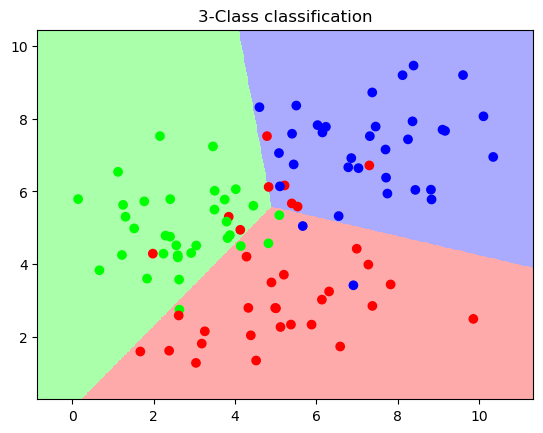

In [12]:
if ("classifyVectorMulticlass" in dir()): # Check if you have defined a function to classify a list of points
    # Create color maps
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    h = .02  # step size in the mesh

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    gridpts = np.c_[xx.ravel(), yy.ravel()]
    m, n = gridpts.shape # m is the number of samples and n is the number of features
    ones = np.ones(shape=(m, 1))
    gridpts = np.hstack( (ones, gridpts) )
    Z = classifyVectorMulticlass(gridpts, w)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification")

    plt.show()

## 3.3 Non-Linear Decision Boundaries

In [13]:
# Load the synthetic dataset
import pickle

with open('P3data_nonLinear.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(117, 2)
(117,)


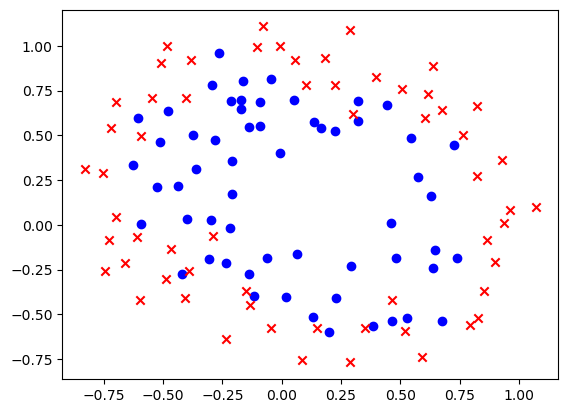

In [14]:
# Plot the data
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

<font color="blue">Train a Logistic Regression classifier and draw its decision boundary over this new data. What do you observe?</font>

In [15]:
# Your Code Here

# Append the x0 column (for the bias term w0)
m, n = X.shape # m is the number of samples and n is the number of features
ones = np.ones(shape=(m, 1))
Xaugmented = np.hstack( (ones, X) )

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(Xaugmented, y)
print ("Estimated weights:", w)

#Evaluate the classifier accuracy in the training data
H = classifyVector(Xaugmented, w)
print ("Training Accuracy :", np.sum(H == y) / m)

Converged after 273 iterations
Estimated weights: [[-0.00573131]
 [-0.21452903]
 [-0.01028951]]
Training Accuracy : 0.5299145299145299


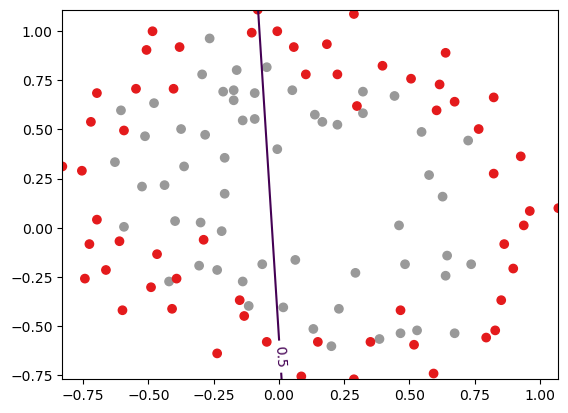

In [16]:
plotDecisionBoundary(X, y, w)

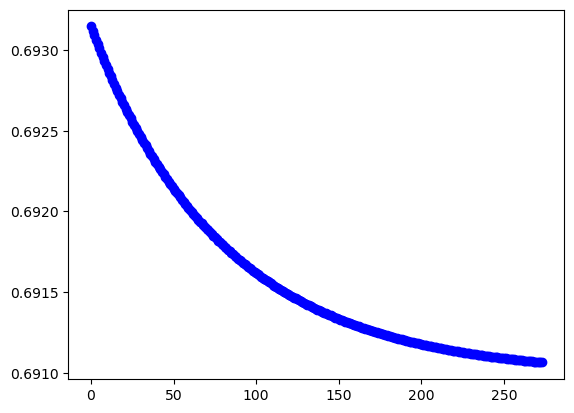

In [17]:
plt.plot(np.arange(len(J)), J, 'bo')

---

*Your Answer Here*

*In this case, a linear classifier does not separate the data correctly. The gradient descent process does converge (it finds the best solution possible), but the best solution possible here is not really good at all...*

---

One way to fit the data better is to create more features from each data point. For example, if we map the original features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power we would get:

$MapFeature(x_1,x_2) = [1, x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3, \dots , x_1x_2^5, x_2^6]$

As a result of this mapping, our vector of two features is transformed into a 28-D vector (28 . The Logistic Regression classifier trained on this high dimensional feature space will have a more complex decision boundary (i.e. more degrees of freedom) and will appear nonlinear when drawn in the 2D plot.

To make our life easier, we will make a function to do this mapping of features. Note also that before we can use these new features, we should normalise them. It seems like a good idea to include the normalisation into the same function.

Moreover since at the time of applying our model to new data we would need to normalise any such new data IN THE SAME WAY as the training data we used, it is wise to keep track of the means and sigmas we used for normalising. Therefore, we will return the means and sigmas from the function as well.

Then in the future we could ask the function to use these same means and sigmas for normalisation (instead of calculating them anew), by passing them as arguments. A clever way to do this would be to allow the function to take an array of means and an array of sigmas as arguments. If we do give some values for these, then the function will use these values. If not (so the default empty vector will be given) then the function would calculate these arrays from the data.

Below is the function that does just that. You can accept this code as is if you want.

In [18]:
def mapFeatureAndNormalise_AllQuadTerms(x1, x2, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps 2D features to quadratic features.
    Returns a new feature vector with more features, comprising of
    x1, x2, x1^2, x2^2, x1*x2, x1*x2^2, etc...
    '''
    
    x1 = x1.reshape(-1, 1) # make it into a column vector
    x2 = x2.reshape(-1, 1) # make it into a column vector

    DesignMatrix = np.ones_like(x1) # start with a column of ones
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            c = (x1 ** (i - j)) * (x2 ** j)
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd            
            
    # Scale features and set them to zero mean (standarize)
    # normalize everything except X0 (the artificial first feature that we set to ones)
    for i in range(1, DesignMatrix.shape[1]):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i];

    return DesignMatrix, mu, sigma

Now, at the time of using this, we expect three things to be returned: the new features, the calculated means and the calculated standard deviations. So the right way to use it is as follows (example for features up to degree 3):

In [ ]:
deg = 3
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)
print("output has shape:", features.shape) # Should be 117 rows (equal to the number of data points) and 10 columns (equal to the new number of features)
print("Mean (and Sigma) has shape", mu.shape)

output has shape: (117, 10)
Mean (and Sigma) has shape (10,)


<font color="blue">Create new features up to degree = 6, and then run gradient descent on these new features. How fast does this converge? What is your training accuracy now?</font>

Converged after 5173 iterations
Training Accuracy : 0.8717948717948718


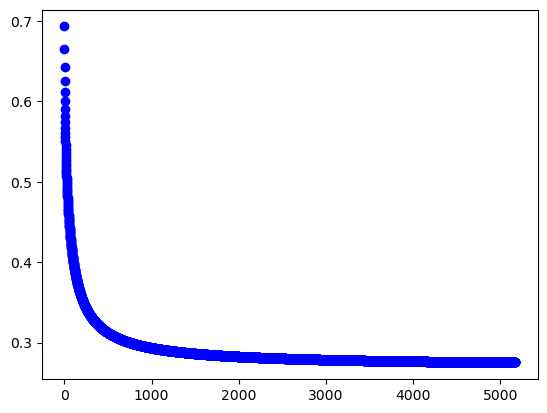

In [20]:
#Your Code Here

deg = 6
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(features,y)

H = classifyVector(features, w)
print ("Training Accuracy : {0}".format(str(float(np.sum(H == y)) / y.shape[0])))

plt.plot(np.arange(len(J)), J, 'bo')

---

*Your Answer Here*

*The training accuracy is now much higher, as we are essentially producing a non-linear decision surface. The problem is more complex now, so it takes longer to converge.*

---

In [21]:
w.shape

(28, 1)

Plotting your results using our old function does not work well now, as we want to plot in the original space, but our model works in the new feature space we created. We have to inform our plotting function about what kind of feature embedding (degrees, means and sigmas it should use). We update this below - once again, you can just accept this code as is.

In [22]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees, means, sigmas):    
    #Plot data
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):        
            feature, _, _ = mapFeatureAndNormalise_AllQuadTerms(x1 = np.array(u[i]), x2 = np.array(v[j]), degree = degrees, preCalcMeans = means, preCalcStd=sigmas)
            z[i, j] = sigmoid(feature.dot(w))
            
    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()

<font color=blue>Use the function above, to draw the non-linear decision boundary you have found.</font>

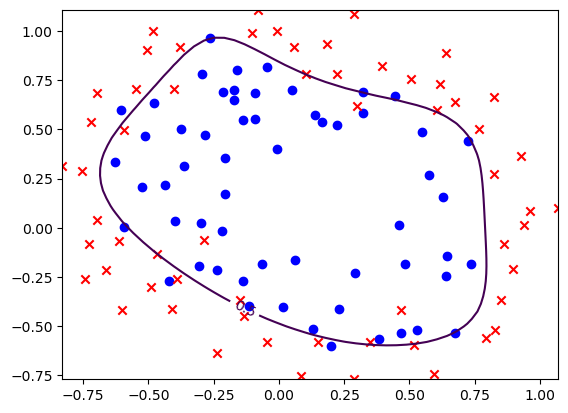

In [23]:
#Your Code Here

plotDecisionBoundary_withEmbeddedFeatures(X, y, w, deg, mu, sigma)

<font color=blue>Now generate a different number of features by changing the value of `deg` (e.g. features up to degree 1, 2, 3, ...15), run gradient descent for different degrees and plot the decision boundary. What do you observe?

Training Accuracy : 0.9145299145299145


c:\ProgramData\Anaconda3\envs\analysis\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


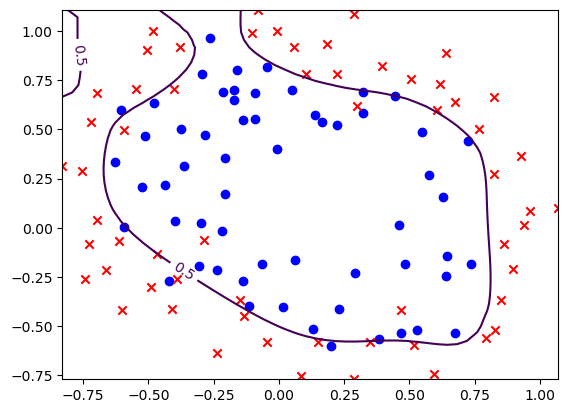

In [24]:
# Your Code Here

deg = 15
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(features, y)

H = classifyVector(features, w)
print ("Training Accuracy : {0}".format(str(float(np.sum(H == y)) / y.shape[0])))

plotDecisionBoundary_withEmbeddedFeatures(X, y, w, deg, mu, sigma)

---

*Your Answer Here*

*As we introduce more features, the decision surface becomes more complex, and it is able to classify correctly more and more points. But at the same time, it seems that it is eventually becoming too complex for the problem at hand...*

---
